In [4]:
import pandas as pd
import sqlite3 as sq
from sklearn.model_selection import train_test_split

conn = sq.connect("../paladins.db")

df = pd.read_sql_query("SELECT * FROM match", conn)

df["result"] = df["result"].apply(lambda x: 0 if x == 'L' else 1)

df = pd.get_dummies(df, columns=["champion"], dtype=int)
print(df)

              username  champ_level   k   d   a  credits  cpm  result  damage  \
0            KaiserG02           33  10  17  17     3057  204       0   63731   
1               M0rton           59   9   9   9     2551  170       0   50123   
2              Yugies_           28   8  12  12     2214  148       0   33813   
3           kakohamofu           37  15   5   5     3111  207       0   71888   
4             mateom02           46   1  14  14     2222  148       0   26488   
...                ...          ...  ..  ..  ..      ...  ...     ...     ...   
17904        GreyFoxKC           60   2  17  17     4101  256       0   43901   
17905       NimdaBunny           42  21   3   3     4438  277       0  101813   
17906            SE7VN           58   2   8   8     3513  220       0   32108   
17907  TTVChatchanisin           26   5  12  12     4502  281       0   56297   
17908    Yagorathfloyd            3   4  13  13     1220   76       0   51722   

       weapon  ...  champio

In [9]:


champion_cols = [col for col in df.columns if col.startswith("champion_")]
agg_dict = {col: 'sum' for col in champion_cols}
agg_dict.update({"result" : "first", "match_id" : "first"})

df = df.groupby(["match_id", "result"], as_index=False).agg(agg_dict).reset_index()

X = df[champion_cols]
y = df["result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dropout(0.3),                                            
    layers.Dense(32, activation='relu'),                            
    layers.Dense(1, activation='sigmoid')                            
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

NameError: name 'X_train' is not defined

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5506 - loss: 0.9754 
Test Accuracy: 0.55
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
Predict accuracy: [[0.7045325 ]
 [0.27379692]
 [0.5309123 ]
 [0.32857606]
 [0.6327267 ]
 [0.32534322]
 [0.6710773 ]
 [0.347662  ]
 [0.03364013]
 [0.09588391]
 [0.19160976]
 [0.47379658]
 [0.40225902]
 [0.6989008 ]
 [0.3520268 ]
 [0.48439777]
 [0.97269326]
 [0.00390513]
 [0.71848726]
 [0.11275169]
 [0.65252775]
 [0.19822297]
 [0.88831276]
 [0.93125165]
 [0.56556404]
 [0.7721983 ]
 [0.7001795 ]
 [0.8976978 ]
 [0.99946594]
 [0.06298843]
 [0.9853579 ]
 [0.33203772]
 [0.95011574]
 [0.14575487]
 [0.4776407 ]
 [0.6371842 ]
 [0.0020486 ]
 [0.19386077]
 [0.17099921]
 [0.48717466]
 [0.5912023 ]
 [0.21686704]
 [0.12809211]
 [0.8219531 ]
 [0.01892307]
 [0.01637806]
 [0.9335117 ]
 [0.15040883]
 [0.1883107 ]
 [0.8293849 ]
 [0.80945766]
 [0.8018872 ]
 [0.95099694]
 [0.69974846]
 [0.55964315]
 [0.29371122]
 [0.00196553]
 [0.8329658 ]
 [0.33930594]
 [0.0171823 ]
 [0.992

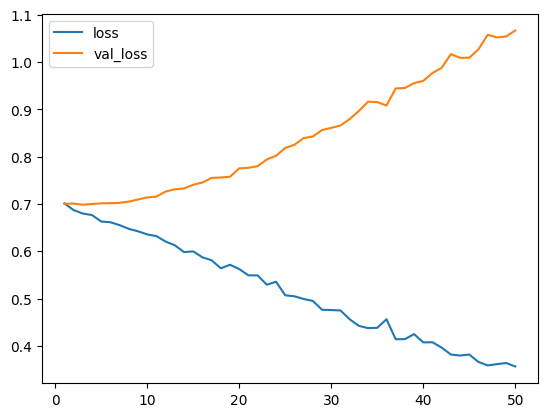

In [19]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred_proba = model.predict(X_test)
print(f"Predict accuracy: {y_pred_proba}")

loss = history.history["loss"]
plt.plot(np.arange(1,len(loss)+1),loss, label="loss")
val_loss = history.history["val_loss"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss, label="val_loss")
plt.legend()